<h1>analisando os dados de uma página web</h1>
<h6>link: https://pt.wikipedia.org/wiki/Copa_do_Mundo_FIFA</h6>

In [74]:
#importando bibliotecas
import pandas as pd
import requests
%matplotlib inline

In [60]:
link = 'https://pt.wikipedia.org/wiki/Copa_do_Mundo_FIFA'
resposta = requests.get(link)
resposta.text

'<!DOCTYPE html>\n<html class="client-nojs" lang="pt" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>Copa do Mundo FIFA – Wikipédia, a enciclopédia livre</title>\n<script>document.documentElement.className = document.documentElement.className.replace( /(^|\\s)client-nojs(\\s|$)/, "$1client-js$2" );</script>\n<script>(window.RLQ=window.RLQ||[]).push(function(){mw.config.set({"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Copa_do_Mundo_FIFA","wgTitle":"Copa do Mundo FIFA","wgCurRevisionId":53985442,"wgRevisionId":53985442,"wgArticleId":6133,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Páginas que usam Timeline","!CS1 inglês-fontes em língua (en)","!Páginas que usam hiperligações mágicas ISBN","!Artigos destacados na Wikipédia em letão","!Artigos destacados na Wikipédia em scots","!Artigos destacados na Wikipédia em tailandês","!Artigos destacados na Wikipédia em ind

In [61]:
#obter a resposta em formato html
table = pd.read_html(resposta.text)

In [62]:
table

[                                                    0  \
 0                                  Copa do Mundo FIFA   
 1                                                 NaN   
 2                                        Dados gerais   
 3                                         Organização   
 4                                             Edições   
 5                                    Local de disputa   
 6                                             Sistema   
 7   Dados históricos  Primeiro vencedor Uruguai (1...   
 8                                    Dados históricos   
 9                                   Primeiro vencedor   
 10                                    Último vencedor   
 11  Estatísticas  Total de gol(o)s 2 548  Total de...   
 12                                       Estatísticas   
 13                                   Total de gol(o)s   
 14                                     Total de jogos   
 15                                              Média   
 16           

In [63]:
#Data frame referente a tabela 12
df = table[11]

df.head()

,0,1,2,3,4
0,Edição,Ano,Estádio,Local,Público pagante
1,I,1930,Estádio Centenário,Montevidéu,68.346
2,II,1934,Estádio do Partido Nacional Fascista,Roma,55.000
3,III,1938,Estádio Olímpico Yves-du-Manoir,Colombes,45.000
4,IV,1950,Estádio do Maracanã,Rio de Janeiro,173.850


In [64]:
#mudando o nome das colunas usando a primeira linha

df.columns = df.iloc[0]

df.head()

,Edição,Ano,Estádio,Local,Público pagante
0,Edição,Ano,Estádio,Local,Público pagante
1,I,1930,Estádio Centenário,Montevidéu,68.346
2,II,1934,Estádio do Partido Nacional Fascista,Roma,55.000
3,III,1938,Estádio Olímpico Yves-du-Manoir,Colombes,45.000
4,IV,1950,Estádio do Maracanã,Rio de Janeiro,173.850


In [68]:
#apagando a primeira linha
df.drop(df.index[0], inplace=True)

df.head()

,Edição,Ano,Estádio,Local,Público pagante
3,III,1938,Estádio Olímpico Yves-du-Manoir,Colombes,45.000
4,IV,1950,Estádio do Maracanã,Rio de Janeiro,173.850
5,V,1954,Estádio Wankdorf,Berna,62.500
6,VI,1958,Estádio Råsunda,Solna,49.737
7,VII,1962,Estádio Nacional de Chile,Santiago,68.679


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19 entries, 3 to 21
Data columns (total 5 columns):
Edição             19 non-null object
Ano                19 non-null object
Estádio            19 non-null object
Local              19 non-null object
Público pagante    19 non-null object
dtypes: object(5)
memory usage: 912.0+ bytes


In [71]:
#Converter a coluna publico pagante para int
df['Público pagante'] = df['Público pagante'].str.replace('.', '').astype(int)



In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19 entries, 3 to 21
Data columns (total 5 columns):
Edição             19 non-null object
Ano                19 non-null object
Estádio            19 non-null object
Local              19 non-null object
Público pagante    19 non-null int32
dtypes: int32(1), object(4)
memory usage: 836.0+ bytes


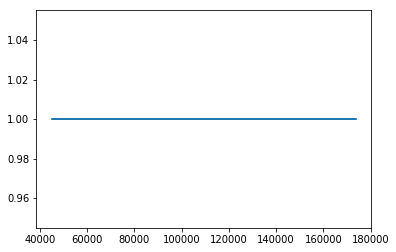

In [73]:
#vamos pçotar um gráfico com a evolução do público pagante
df['Público pagante'].value_counts().plot.line()

In [78]:
#importando uma biblioteca nova para gráfico
import seaborn as sns
import matplotlib.pyplot as plt

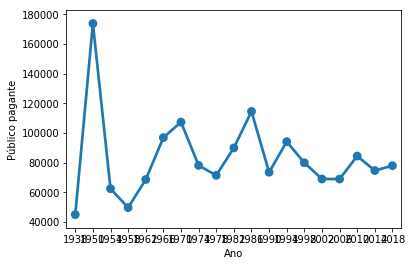

In [79]:
sns.pointplot(x='Ano', y='Público pagante', data=df)

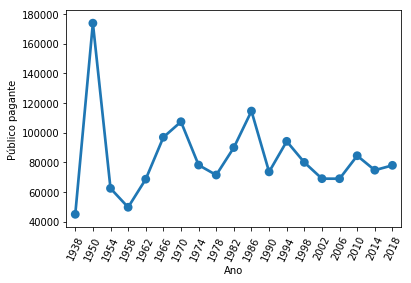

In [83]:
sns.pointplot(x='Ano', y='Público pagante', data=df)

#ajustando as legendas
plt.xticks(rotation=65)
plt.show()